# Week 7: Deep Learning Essentials

This notebook focuses on the structure of neural networks, how to build and compile one, and how to add different layers and features to the NN. Throught the notebook we will focus again on the task of predicting house prices from house features in the Boston area.

## Steps of Backpropagation 

1. Forward pass: makes prediction from the input to the output layer
2. Error Measurement: using a loss function it compares the desired output and the actual output of the network and returns some measure of error
3. Reverse pass: going backward computes how much each connection contributed to the error, until reaching the input layer
4. Gradient Descent step: tweaks the connection weights to reduce the error

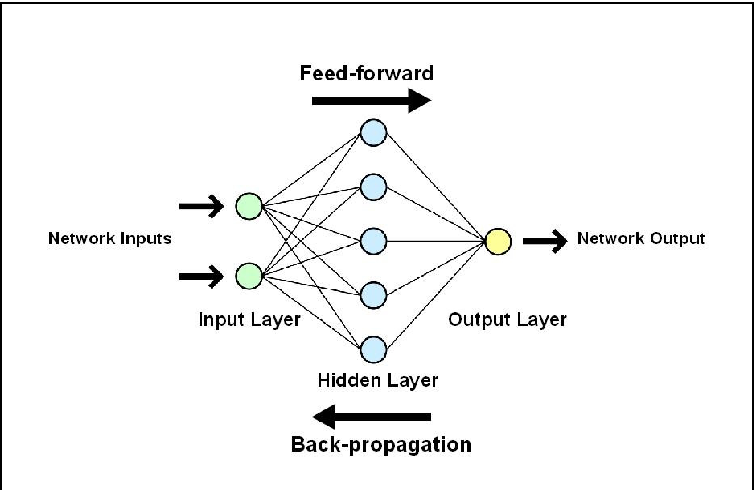

## Building a Network

- 1 input layer + 1 or more hidden layers + 1 output layer
- \# input neurons = \# features 
- \# hidden layers = typically from 1 to 5 
- \# neurons per layer = typycally from 10 to 100
- hidden activation: ReLU
- \# output layers, output activation, loss function: depends on the problem 

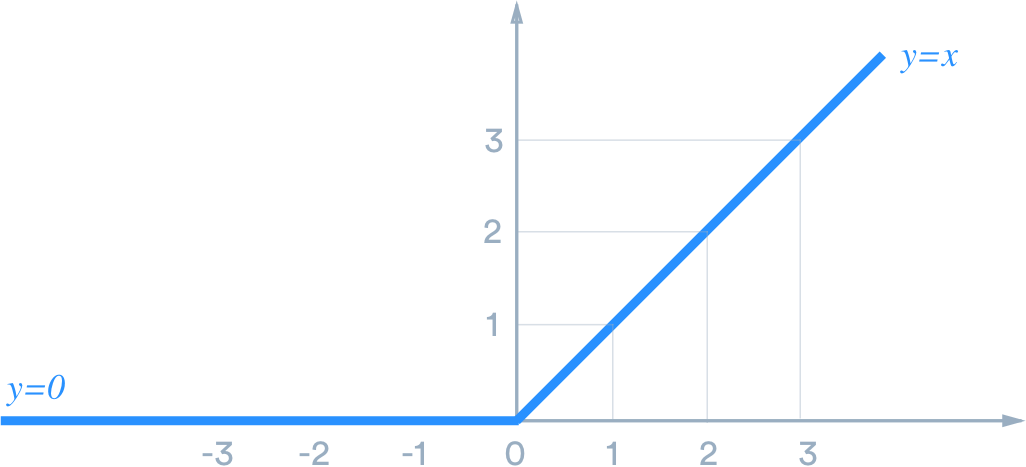

## Continuous Outcomes

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split

from sklearn.datasets import load_boston
boston = load_boston()

bdata = pd.DataFrame(boston.data, columns=boston['feature_names'])
X, y = bdata.iloc[:,:],boston.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

/opt/homebrew/Caskroom/miniforge/base/envs/brj/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include t

- \# output neurons: 1
- output activation function: none
- loss function: MSE or Mean Absolute Error

In [3]:
from tensorflow import keras
model = keras.models.Sequential()

model.add(keras.layers.Dense(30, input_dim = X.shape[1], activation="relu"))
model.add(keras.layers.Dense(15, activation="relu"))
model.add(keras.layers.Dense(1))

model.summary()

2022-11-14 10:50:36.719323: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-11-14 10:50:36.719879: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Metal device set to: Apple M1 Pro

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 30)                420       
                                                                 
 dense_1 (Dense)             (None, 15)                465       
                                                                 
 dense_2 (Dense)             (None, 1)                 16        
                                                                 
Total params: 901
Trainable params: 901
Non-trainable params: 0
_________________________________________________________________


In [4]:
model.compile(loss="mean_squared_error",
              optimizer="adam",
              metrics=["mean_squared_error"])

In [5]:
history = model.fit(X_train, y_train, epochs=8,
                    validation_split=0.2)

Epoch 1/8


2022-11-14 10:50:40.828707: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-11-14 10:50:41.026055: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


11/11 [==============================] - 3s 71ms/step - loss: 16231.5488 - mean_squared_error: 16231.5488 - val_loss: 3969.4775 - val_mean_squared_error: 3969.4775
Epoch 2/8
11/11 [==============================] - 0s 10ms/step - loss: 1521.0814 - mean_squared_error: 1521.0814 - val_loss: 346.0503 - val_mean_squared_error: 346.0503
Epoch 3/8
 1/11 [=>............................] - ETA: 0s - loss: 550.1287 - mean_squared_error: 550.1287

2022-11-14 10:50:43.644360: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


11/11 [==============================] - 0s 10ms/step - loss: 671.7598 - mean_squared_error: 671.7598 - val_loss: 858.6913 - val_mean_squared_error: 858.6913
Epoch 4/8
11/11 [==============================] - 0s 9ms/step - loss: 506.0011 - mean_squared_error: 506.0011 - val_loss: 173.9444 - val_mean_squared_error: 173.9444
Epoch 5/8
11/11 [==============================] - 0s 9ms/step - loss: 159.5708 - mean_squared_error: 159.5708 - val_loss: 130.2110 - val_mean_squared_error: 130.2110
Epoch 6/8
11/11 [==============================] - 0s 9ms/step - loss: 148.9682 - mean_squared_error: 148.9682 - val_loss: 84.3095 - val_mean_squared_error: 84.3095
Epoch 7/8
11/11 [==============================] - 0s 9ms/step - loss: 96.0867 - mean_squared_error: 96.0867 - val_loss: 82.3578 - val_mean_squared_error: 82.3578
Epoch 8/8
11/11 [==============================] - 0s 9ms/step - loss: 85.5603 - mean_squared_error: 85.5603 - val_loss: 74.3312 - val_mean_squared_error: 74.3312


In [6]:
history.history['val_mean_squared_error'][-1]

74.3311767578125

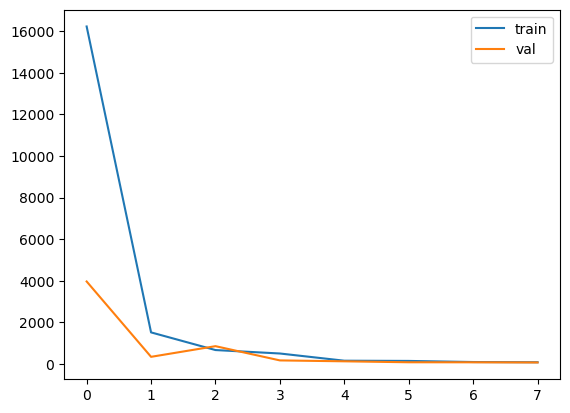

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
# Plot performance by epoch
plt.plot(history.epoch,history.history['mean_squared_error'])
plt.plot(history.epoch,history.history['val_mean_squared_error'])
plt.legend(['train', 'val'], loc='best')

In [8]:
for lay in model.layers:
    print(lay.name)
    print(lay.get_weights())

dense
[array([[-0.18273993, -0.13366167,  0.06472525,  0.26213557, -0.01822484,
         0.32613194,  0.04271035, -0.30102742, -0.26506346,  0.10277605,
        -0.29113895, -0.2801614 , -0.00217243, -0.30570912, -0.37760094,
         0.00901615, -0.06143448,  0.03801975, -0.33000785, -0.04169288,
         0.33121234, -0.15025586, -0.09115969,  0.02624574, -0.30316883,
        -0.00273641,  0.18702796, -0.26837677, -0.24465752, -0.3502573 ],
       [ 0.24223673, -0.3127554 ,  0.1423077 , -0.11211866,  0.02743655,
        -0.36577535, -0.10436806,  0.14616573,  0.04092725,  0.07403251,
        -0.3565959 ,  0.05740461, -0.21698426,  0.08779557,  0.20896125,
        -0.2734106 ,  0.10893807, -0.22502239,  0.3065924 , -0.35917673,
        -0.04068736, -0.28893113,  0.2609822 ,  0.10735077, -0.12125604,
         0.36600155, -0.37874028,  0.18965632, -0.13972993,  0.34836027],
       [ 0.36567676,  0.05944097, -0.16058685, -0.20192456,  0.36767375,
         0.01869541,  0.22595184,  0.22532

In [8]:
#pip install pydot

In [10]:

from IPython.display import SVG
from tensorflow.keras.utils import plot_model
plot_model(model,
                   show_shapes=True,
                   show_layer_names=False)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


4/4 [==============================] - 0s 53ms/step


2022-11-13 16:07:19.176811: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


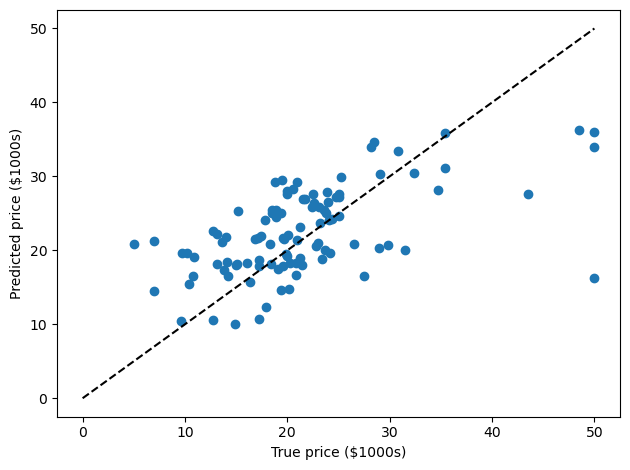

In [11]:
import numpy as np
y_pred = model.predict(X_test)

plt.scatter(y_test, y_pred)
plt.plot([0, 50], [0, 50], '--k')
plt.axis('tight')
plt.xlabel('True price ($1000s)')
plt.ylabel('Predicted price ($1000s)')
plt.tight_layout()

## Binary Classification

In [12]:
beer_data = pd.read_csv("https://www.dropbox.com/s/5fbmj4gqktrmn00/beers.csv?dl=1")
X, y = beer_data.iloc[:, :-1], beer_data.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

- \# output neurons: 1
- output activation function: Logistic
- loss function: binary_crossentropy

Reference to understand loss functions for binary prediction [here](https://towardsdatascience.com/understanding-binary-cross-entropy-log-loss-a-visual-explanation-a3ac6025181a) 

In [13]:
model = keras.models.Sequential()

model.add(keras.layers.Dense(50, input_dim = X.shape[1], activation="relu"))
model.add(keras.layers.Dense(25, activation="relu"))
model.add(keras.layers.Dense(1, activation="sigmoid"))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 50)                250       
                                                                 
 dense_4 (Dense)             (None, 25)                1275      
                                                                 
 dense_5 (Dense)             (None, 1)                 26        
                                                                 
Total params: 1,551
Trainable params: 1,551
Non-trainable params: 0
_________________________________________________________________


In [14]:
model.compile(loss="binary_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

In [15]:
history = model.fit(X_train, y_train, epochs=8,
                    validation_split=0.2)

Epoch 1/8


/opt/homebrew/Caskroom/miniforge/base/envs/brj/lib/python3.9/site-packages/keras/engine/data_adapter.py:1699: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]
2022-11-13 16:07:45.094209: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


5/5 [==============================] - ETA: 0s - loss: 0.8048 - accuracy: 0.4722

2022-11-13 16:07:46.069881: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


5/5 [==============================] - 1s 114ms/step - loss: 0.8048 - accuracy: 0.4722 - val_loss: 0.7145 - val_accuracy: 0.5000
Epoch 2/8
5/5 [==============================] - 0s 20ms/step - loss: 0.6721 - accuracy: 0.5625 - val_loss: 0.6726 - val_accuracy: 0.6389
Epoch 3/8
5/5 [==============================] - 0s 19ms/step - loss: 0.6455 - accuracy: 0.6042 - val_loss: 0.6755 - val_accuracy: 0.5278
Epoch 4/8
5/5 [==============================] - 0s 16ms/step - loss: 0.6422 - accuracy: 0.5903 - val_loss: 0.6676 - val_accuracy: 0.5833
Epoch 5/8
5/5 [==============================] - 0s 16ms/step - loss: 0.6292 - accuracy: 0.6319 - val_loss: 0.6524 - val_accuracy: 0.7500
Epoch 6/8
5/5 [==============================] - 0s 15ms/step - loss: 0.6181 - accuracy: 0.6875 - val_loss: 0.6487 - val_accuracy: 0.6389
Epoch 7/8
5/5 [==============================] - 0s 17ms/step - loss: 0.6115 - accuracy: 0.6806 - val_loss: 0.6464 - val_accuracy: 0.7500
Epoch 8/8
5/5 [============================

0.7222222089767456


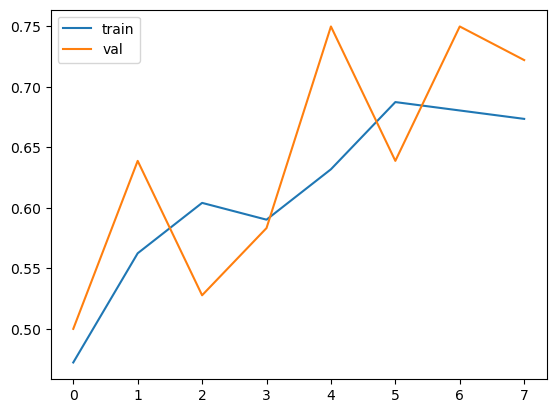

In [17]:
print(history.history['val_accuracy'][-1])
plt.plot(history.epoch,history.history['accuracy'])
plt.plot(history.epoch,history.history['val_accuracy'])
plt.legend(['train', 'val'], loc='best')

In [18]:
y_pred_prob = model.predict(X_test)
y_pred = np.around(y_pred_prob) 

y_pred_prob[0:7], y_pred[0:7], y_test[0:7]

1/2 [==============>...............] - ETA: 0s

2022-11-13 16:08:07.000662: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 0s 223ms/step


/var/folders/4l/50kz2_m54d53hffxvvphv1lr0000gn/T/ipykernel_34953/3858686982.py:4: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  y_pred_prob[0:7], y_pred[0:7], y_test[0:7]


(array([[0.72216904],
        [0.68301123],
        [0.5818106 ],
        [0.5757383 ],
        [0.5965915 ],
        [0.7904124 ],
        [0.3543056 ]], dtype=float32),
 array([[1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [0.]], dtype=float32),
 9      1
 184    0
 120    1
 207    1
 148    1
 214    1
 182    1
 Name: is_yummy, dtype: int64)

## Multiclass Classification

In [19]:
from sklearn.datasets import load_iris
iris = load_iris()

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=42)

- \# output neurons: \# classes
- output activation function: softmax
- loss function: sparse_categorical_crossentropy

In [20]:
model = keras.models.Sequential()

model.add(keras.layers.Dense(100, input_dim=X_train.shape[1], activation="relu"))
model.add(keras.layers.Dense(75, activation="relu"))
model.add(keras.layers.Dense(60, activation="relu"))
model.add(keras.layers.Dense(3, activation="softmax"))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 100)               500       
                                                                 
 dense_7 (Dense)             (None, 75)                7575      
                                                                 
 dense_8 (Dense)             (None, 60)                4560      
                                                                 
 dense_9 (Dense)             (None, 3)                 183       
                                                                 
Total params: 12,818
Trainable params: 12,818
Non-trainable params: 0
_________________________________________________________________


In [21]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

In [23]:
history = model.fit(X_train, y_train, epochs=8,
                    validation_split=0.2)

Epoch 1/8
3/3 [==============================] - 0s 27ms/step - loss: 0.7635 - accuracy: 0.8750 - val_loss: 0.7225 - val_accuracy: 0.9583
Epoch 2/8
3/3 [==============================] - 0s 19ms/step - loss: 0.7129 - accuracy: 0.9271 - val_loss: 0.6925 - val_accuracy: 0.9583
Epoch 3/8
3/3 [==============================] - 0s 19ms/step - loss: 0.6663 - accuracy: 0.9479 - val_loss: 0.6585 - val_accuracy: 0.9583
Epoch 4/8
3/3 [==============================] - 0s 20ms/step - loss: 0.6181 - accuracy: 0.9583 - val_loss: 0.6038 - val_accuracy: 0.9583
Epoch 5/8
3/3 [==============================] - 0s 20ms/step - loss: 0.5734 - accuracy: 0.9479 - val_loss: 0.5589 - val_accuracy: 0.9583
Epoch 6/8
3/3 [==============================] - 0s 19ms/step - loss: 0.5325 - accuracy: 0.9062 - val_loss: 0.5264 - val_accuracy: 0.9583
Epoch 7/8
3/3 [==============================] - 0s 20ms/step - loss: 0.4933 - accuracy: 0.9688 - val_loss: 0.5093 - val_accuracy: 1.0000
Epoch 8/8
3/3 [===================

1.0


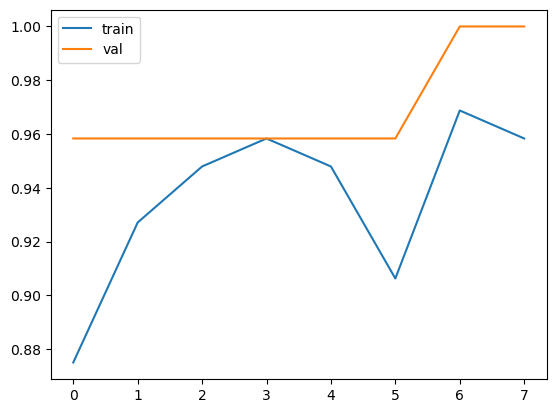

In [25]:
print(history.history['val_accuracy'][-1])
plt.plot(history.epoch,history.history['accuracy'])
plt.plot(history.epoch,history.history['val_accuracy'])
plt.legend(['train', 'val'], loc='best')

In [26]:
y_pred_prob = model.predict(X_test)
y_pred = np.argmax(y_pred_prob,axis=1)

y_pred_prob[0:7], y_pred[0:7], y_test[0:7]

1/1 [==============================] - 0s 58ms/step


2022-11-13 16:08:54.762186: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


(array([[0.06782081, 0.53583676, 0.39634246],
        [0.8802876 , 0.10452063, 0.01519181],
        [0.00544604, 0.26191014, 0.73264384],
        [0.07847241, 0.5398919 , 0.3816357 ],
        [0.05619431, 0.54352254, 0.40028322],
        [0.84820676, 0.13030759, 0.02148569],
        [0.19578753, 0.5592323 , 0.24498023]], dtype=float32),
 array([1, 0, 2, 1, 1, 0, 1]),
 array([1, 0, 2, 1, 1, 0, 1]))

## Improve NN Performance

During backpropagation the algorithm computes the gradient of the cost function w.r.t each parameter and it uses these gradients to update each parameter with a Gradient Descent step. <br>

<b>Vanishing gradient problem:</b> gradients often get smaller and smaller as the algorithm progresses down to the lower layers $\implies$ lower layers connection weights remain virtually unchanged. <br>

<b>Exploding gradient problem:</b> gradients grow bigger and bigger until layers get insanely large weight updates and the algorithm diverges.

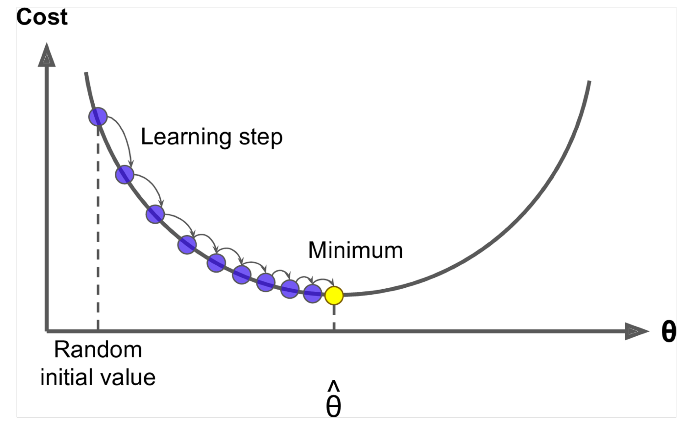

### Initializers

**Problems:**

- Initial weights too large $\implies$ Exploding Gradient
- Initial weights too small $\implies$ Vanishing Gradient
- Correlated (collinear) initial weights $\implies$ Backpropagation cannot distinguish their contribution to the output error

**Solution:** Initialization of neuron weights should be random *but* you can choose the distribution (standard practice is to use "Glorot" and "HeNormal", which alleviate the problem of unstable gradients).

In [27]:
X, y = bdata.iloc[:,:],boston.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from tensorflow.keras import initializers

model = keras.models.Sequential()

model.add(keras.layers.Dense(30, input_dim = X.shape[1], activation="relu",
    kernel_initializer=initializers.he_normal()))
model.add(keras.layers.Dense(15, activation="relu"))
model.add(keras.layers.Dense(1, activation="relu"))

model.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 30)                420       
                                                                 
 dense_11 (Dense)            (None, 15)                465       
                                                                 
 dense_12 (Dense)            (None, 1)                 16        
                                                                 
Total params: 901
Trainable params: 901
Non-trainable params: 0
_________________________________________________________________


### Batch Normalization and Early Stopping

**Problem:** Distribution of weights is likely to change at every step of backpropagation $\implies$ slower and less efficient model.

**Solution:** aftereach layer normalize the inputs to have mean zero and variance 1. It helps to increase performance, speed up training, and regularize the model.

In [28]:
model = keras.models.Sequential()

model.add(keras.layers.Dense(30, input_dim = X.shape[1], activation="relu",
    kernel_initializer=initializers.he_normal()))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dense(15, activation="relu"))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dense(1, activation="relu"))

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_13 (Dense)            (None, 30)                420       
                                                                 
 batch_normalization (BatchN  (None, 30)               120       
 ormalization)                                                   
                                                                 
 dense_14 (Dense)            (None, 15)                465       
                                                                 
 batch_normalization_1 (Batc  (None, 15)               60        
 hNormalization)                                                 
                                                                 
 dense_15 (Dense)            (None, 1)                 16        
                                                                 
Total params: 1,081
Trainable params: 991
Non-trainabl

In [29]:
model.compile(loss="mean_squared_error",
              optimizer="adam",
              metrics=["mean_squared_error"])

In [30]:
es = keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1)

history = model.fit(X_train, y_train, epochs=8,
                    validation_split=0.2, callbacks=[es])

Epoch 1/8


2022-11-13 20:43:26.518680: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


11/11 [==============================] - 2s 60ms/step - loss: 596.2584 - mean_squared_error: 596.2584 - val_loss: 559.7991 - val_mean_squared_error: 559.7991
Epoch 2/8
 1/11 [=>............................] - ETA: 0s - loss: 660.1763 - mean_squared_error: 660.1763

2022-11-13 20:43:27.919519: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


11/11 [==============================] - 0s 18ms/step - loss: 588.1109 - mean_squared_error: 588.1109 - val_loss: 559.7991 - val_mean_squared_error: 559.7991
Epoch 2: early stopping


### Alternative Activation Functions

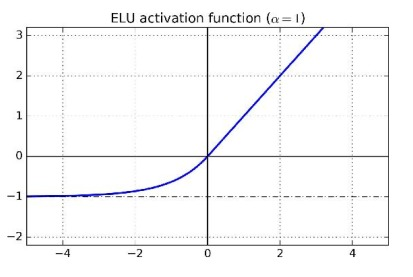 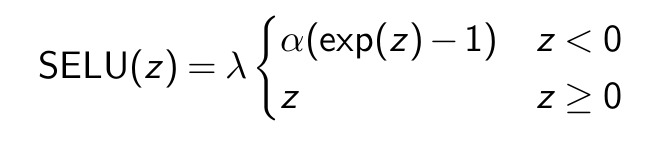

Exponential Linear Unit (ELU) and Scaled ELU (SELU). In particular, SELU enhances the performance of the network, that is a neural network with only dense layers, each using SELU as activation function, the network will self-normalize, provided that:
- inputs are standardized
- it uses LeCun normal initialization for weights
- set $\lambda \approx 1.0507$ and $\alpha \approx 1.6732$
- in general SELU > ELU > ReLU

Note that with SELU batch normalization is not needed as the newtwork self-normalizes

### Optimizer 

Existing research showed that it has a big impact on the performance of the model. <i>Adam</i> (adaptive moment estimation) is faster and almost as good as <i>sgd</i>. 

In [31]:
model.compile(loss="mean_squared_error",
              optimizer="sgd",
              metrics=["mean_squared_error"])

es = keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1)

history = model.fit(X_train, y_train, epochs=8,
                    validation_split=0.2, callbacks=[es])

Epoch 1/8


2022-11-13 20:45:23.098961: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


11/11 [==============================] - 1s 57ms/step - loss: 265.9472 - mean_squared_error: 265.9472 - val_loss: 559.7991 - val_mean_squared_error: 559.7991
Epoch 2/8
 1/11 [=>............................] - ETA: 0s - loss: 89.5028 - mean_squared_error: 89.5028

2022-11-13 20:45:23.975236: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


11/11 [==============================] - 0s 17ms/step - loss: 91.0055 - mean_squared_error: 91.0055 - val_loss: 193.2239 - val_mean_squared_error: 193.2239
Epoch 2: early stopping


### Regularization and Dropout

Neural network parameters, like regressions, can be regularized with L1 and/or L2 penalties to push weak neurons to zero and create a sparse model $\rightarrow$ avoid overfitting.

In [32]:
model = keras.models.Sequential()

model.add(keras.layers.Dense(30, input_dim = X.shape[1], activation="relu",
    kernel_initializer=initializers.he_normal(), kernel_regularizer = keras.regularizers.l2(0.01)))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dense(15, activation="relu"))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dense(1, activation="relu"))

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 30)                420       
                                                                 
 batch_normalization_2 (Batc  (None, 30)               120       
 hNormalization)                                                 
                                                                 
 dense_17 (Dense)            (None, 15)                465       
                                                                 
 batch_normalization_3 (Batc  (None, 15)               60        
 hNormalization)                                                 
                                                                 
 dense_18 (Dense)            (None, 1)                 16        
                                                                 
Total params: 1,081
Trainable params: 991
Non-trainabl

Alternatively, use <i>dropout</i> during training (it is NOT used during validation), with probability ($p$) between 10% and 50%. Alternative dropout regularizations are:
- Normal dropout: neurons don't get dropped but coefficients are down-weighted by $p$
- Monte Carlo dropout: continues to allow dropout but produce 100 predictions, and averages them

In [33]:
model = keras.models.Sequential()

model.add(keras.layers.Dense(30, input_dim = X.shape[1], activation="relu",
    kernel_initializer=initializers.he_normal()))
model.add(keras.layers.BatchNormalization())
keras.layers.Dropout(0.3)
model.add(keras.layers.Dense(15, activation="relu"))
model.add(keras.layers.BatchNormalization())
keras.layers.Dropout(0.3)
model.add(keras.layers.Dense(1, activation="relu"))

model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_19 (Dense)            (None, 30)                420       
                                                                 
 batch_normalization_4 (Batc  (None, 30)               120       
 hNormalization)                                                 
                                                                 
 dense_20 (Dense)            (None, 15)                465       
                                                                 
 batch_normalization_5 (Batc  (None, 15)               60        
 hNormalization)                                                 
                                                                 
 dense_21 (Dense)            (None, 1)                 16        
                                                                 
Total params: 1,081
Trainable params: 991
Non-trainabl

## Tuning NN Hyperparameters

It is an active area of research. One option is to try combinations of hyperparameters and see which one works best on the validation set, using GridSearchCV or RandomizedSearchCV

In [34]:
def build_model(n_hidden=1, n_neurons=30, learning_rate=3e-3, input_dim=X_train.shape[1]):
    model = keras.models.Sequential()
    model.add(keras.layers.Dense(n_neurons, input_dim=input_dim, activation="relu"))
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation="relu"))
    model.add(keras.layers.Dense(1))
    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    model.compile(loss="mean_squared_error", optimizer=optimizer, metrics=["mean_squared_error"])
    return model

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=.2)

keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)
keras_reg.fit(X_train, y_train, epochs=16,
               validation_data=(X_val, y_val),
              callbacks=[es])
mse_test = keras_reg.score(X_test, y_test)
y_pred = keras_reg.predict(X_test)

Epoch 1/16


/var/folders/4l/50kz2_m54d53hffxvvphv1lr0000gn/T/ipykernel_34953/1890457903.py:13: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)


 1/11 [=>............................] - ETA: 3s - loss: 6962.0972 - mean_squared_error: 6962.0972

2022-11-13 20:45:55.572624: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


11/11 [==============================] - 1s 32ms/step - loss: 1951.8173 - mean_squared_error: 1951.8173 - val_loss: 801.4289 - val_mean_squared_error: 801.4289
Epoch 2/16
 7/11 [==================>...........] - ETA: 0s - loss: 335.9940 - mean_squared_error: 335.9940

2022-11-13 20:45:55.961418: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


11/11 [==============================] - 0s 12ms/step - loss: 333.6025 - mean_squared_error: 333.6025 - val_loss: 205.0871 - val_mean_squared_error: 205.0871
Epoch 2: early stopping
4/4 [==============================] - 0s 7ms/step


2022-11-13 20:45:56.334161: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


In [35]:
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

param_distribs = {
    "n_hidden": [0, 1, 2, 3],
    "n_neurons": np.arange(1, 100),
    "learning_rate": reciprocal(3e-4, 3e-2),
}

rnd_search_cv = RandomizedSearchCV(keras_reg, param_distribs, n_iter=10, cv=3)
rnd_search_cv.fit(X_train, y_train, epochs=100,
                  validation_data=(X_val, y_val),
                  callbacks=[es])


Epoch 1/100
1/7 [===>..........................] - ETA: 2s - loss: 1958.4919 - mean_squared_error: 1958.4919

2022-11-13 20:46:11.097598: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


7/7 [==============================] - 1s 104ms/step - loss: 50475.5938 - mean_squared_error: 50475.5938 - val_loss: 425.6857 - val_mean_squared_error: 425.6857
Epoch 2/100
1/7 [===>..........................] - ETA: 0s - loss: 319.3120 - mean_squared_error: 319.3120

2022-11-13 20:46:11.770573: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


7/7 [==============================] - 0s 18ms/step - loss: 175.9443 - mean_squared_error: 175.9443 - val_loss: 82.9397 - val_mean_squared_error: 82.9397
Epoch 2: early stopping
4/4 [==============================] - 0s 49ms/step - loss: 116.6199 - mean_squared_error: 116.6199
Epoch 1/100
1/7 [===>..........................] - ETA: 1s - loss: 7797.7910 - mean_squared_error: 7797.7910

2022-11-13 20:46:12.443525: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


7/7 [==============================] - 1s 53ms/step - loss: 21086.5820 - mean_squared_error: 21086.5820 - val_loss: 511.9090 - val_mean_squared_error: 511.9090
Epoch 2/100
4/7 [================>.............] - ETA: 0s - loss: 434.4277 - mean_squared_error: 434.4277

2022-11-13 20:46:12.831965: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


7/7 [==============================] - 0s 21ms/step - loss: 364.5150 - mean_squared_error: 364.5150 - val_loss: 115.0924 - val_mean_squared_error: 115.0924
Epoch 2: early stopping
4/4 [==============================] - 0s 17ms/step - loss: 149.2075 - mean_squared_error: 149.2075
Epoch 1/100
1/7 [===>..........................] - ETA: 2s - loss: 1012.8911 - mean_squared_error: 1012.8911

2022-11-13 20:46:13.393187: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


7/7 [==============================] - 1s 54ms/step - loss: 68628.4766 - mean_squared_error: 68628.4766 - val_loss: 146.6069 - val_mean_squared_error: 146.6069
Epoch 2/100
6/7 [========================>.....] - ETA: 0s - loss: 257.4303 - mean_squared_error: 257.4303

2022-11-13 20:46:13.815789: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


7/7 [==============================] - 0s 19ms/step - loss: 236.4713 - mean_squared_error: 236.4713 - val_loss: 103.9265 - val_mean_squared_error: 103.9265
Epoch 2: early stopping
4/4 [==============================] - 0s 51ms/step - loss: 121.6396 - mean_squared_error: 121.6396
Epoch 1/100


2022-11-13 20:46:14.474683: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


7/7 [==============================] - 2s 191ms/step - loss: 216.7488 - mean_squared_error: 216.7488 - val_loss: 119.3848 - val_mean_squared_error: 119.3848
Epoch 2/100
4/7 [================>.............] - ETA: 0s - loss: 139.7684 - mean_squared_error: 139.7684

2022-11-13 20:46:15.748243: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


7/7 [==============================] - 0s 22ms/step - loss: 143.1582 - mean_squared_error: 143.1582 - val_loss: 126.9604 - val_mean_squared_error: 126.9604
Epoch 2: early stopping
4/4 [==============================] - 0s 43ms/step - loss: 131.6986 - mean_squared_error: 131.6986
Epoch 1/100
1/7 [===>..........................] - ETA: 1s - loss: 1503.4918 - mean_squared_error: 1503.4918

2022-11-13 20:46:16.373771: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


7/7 [==============================] - 1s 40ms/step - loss: 576.8011 - mean_squared_error: 576.8011 - val_loss: 89.7565 - val_mean_squared_error: 89.7565
Epoch 2/100
7/7 [==============================] - 0s 18ms/step - loss: 152.0860 - mean_squared_error: 152.0860 - val_loss: 93.5577 - val_mean_squared_error: 93.5577
Epoch 2: early stopping


2022-11-13 20:46:16.680899: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


4/4 [==============================] - 0s 13ms/step - loss: 135.6187 - mean_squared_error: 135.6187
Epoch 1/100
6/7 [========================>.....] - ETA: 0s - loss: 2427.3115 - mean_squared_error: 2427.3115

2022-11-13 20:46:17.150308: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


7/7 [==============================] - 1s 47ms/step - loss: 2184.0864 - mean_squared_error: 2184.0864 - val_loss: 507.4381 - val_mean_squared_error: 507.4381
Epoch 2/100
7/7 [==============================] - 0s 17ms/step - loss: 723.0057 - mean_squared_error: 723.0057 - val_loss: 326.1228 - val_mean_squared_error: 326.1228
Epoch 2: early stopping


2022-11-13 20:46:17.472145: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


4/4 [==============================] - 0s 43ms/step - loss: 319.8166 - mean_squared_error: 319.8166
Epoch 1/100
1/7 [===>..........................] - ETA: 1s - loss: 3004.1724 - mean_squared_error: 3004.1724

2022-11-13 20:46:18.033767: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


7/7 [==============================] - 0s 39ms/step - loss: 1855.9037 - mean_squared_error: 1855.9034 - val_loss: 659.3334 - val_mean_squared_error: 659.3334
Epoch 2/100
7/7 [==============================] - 0s 12ms/step - loss: 454.6806 - mean_squared_error: 454.6806 - val_loss: 158.2357 - val_mean_squared_error: 158.2357
Epoch 2: early stopping
1/4 [======>.......................] - ETA: 0s - loss: 100.6341 - mean_squared_error: 100.6341

2022-11-13 20:46:18.334513: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


4/4 [==============================] - 0s 10ms/step - loss: 211.4491 - mean_squared_error: 211.4491
Epoch 1/100
6/7 [========================>.....] - ETA: 0s - loss: 3540.3276 - mean_squared_error: 3540.3276

2022-11-13 20:46:18.722651: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


7/7 [==============================] - 0s 40ms/step - loss: 3629.9426 - mean_squared_error: 3629.9426 - val_loss: 2567.3416 - val_mean_squared_error: 2567.3416
Epoch 2/100
7/7 [==============================] - 0s 14ms/step - loss: 2693.7007 - mean_squared_error: 2693.7007 - val_loss: 1868.5096 - val_mean_squared_error: 1868.5096
Epoch 2: early stopping


2022-11-13 20:46:18.994269: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


4/4 [==============================] - 0s 18ms/step - loss: 2394.4341 - mean_squared_error: 2394.4341
Epoch 1/100
6/7 [========================>.....] - ETA: 0s - loss: 11116.6973 - mean_squared_error: 11116.6973

2022-11-13 20:46:19.446896: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


7/7 [==============================] - 0s 38ms/step - loss: 10660.6162 - mean_squared_error: 10660.6162 - val_loss: 6753.5942 - val_mean_squared_error: 6753.5942
Epoch 2/100
7/7 [==============================] - 0s 13ms/step - loss: 4784.0649 - mean_squared_error: 4784.0649 - val_loss: 2529.2393 - val_mean_squared_error: 2529.2393
Epoch 2: early stopping
1/4 [======>.......................] - ETA: 0s - loss: 2456.6047 - mean_squared_error: 2456.6047

2022-11-13 20:46:19.736014: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


4/4 [==============================] - 0s 10ms/step - loss: 2653.8010 - mean_squared_error: 2653.8010
Epoch 1/100
5/7 [====================>.........] - ETA: 0s - loss: 2410.3816 - mean_squared_error: 2410.3816

2022-11-13 20:46:20.153754: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


7/7 [==============================] - 1s 44ms/step - loss: 2038.6606 - mean_squared_error: 2038.6606 - val_loss: 743.0673 - val_mean_squared_error: 743.0673
Epoch 2/100
7/7 [==============================] - 0s 14ms/step - loss: 765.3439 - mean_squared_error: 765.3439 - val_loss: 567.5190 - val_mean_squared_error: 567.5190
Epoch 2: early stopping


2022-11-13 20:46:20.472233: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


4/4 [==============================] - 0s 11ms/step - loss: 626.7378 - mean_squared_error: 626.7378
Epoch 1/100
6/7 [========================>.....] - ETA: 0s - loss: 10072.0469 - mean_squared_error: 10072.0469

2022-11-13 20:46:20.892636: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


7/7 [==============================] - 0s 40ms/step - loss: 9519.3574 - mean_squared_error: 9519.3574 - val_loss: 4604.9834 - val_mean_squared_error: 4604.9834
Epoch 2/100
7/7 [==============================] - 0s 13ms/step - loss: 2767.6240 - mean_squared_error: 2767.6240 - val_loss: 769.4357 - val_mean_squared_error: 769.4357
Epoch 2: early stopping
1/4 [======>.......................] - ETA: 0s - loss: 667.2802 - mean_squared_error: 667.2802

2022-11-13 20:46:21.191202: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


4/4 [==============================] - 0s 9ms/step - loss: 675.1921 - mean_squared_error: 675.1921
Epoch 1/100
6/7 [========================>.....] - ETA: 0s - loss: 1026.5673 - mean_squared_error: 1026.5673

2022-11-13 20:46:21.587862: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


7/7 [==============================] - 0s 40ms/step - loss: 994.2123 - mean_squared_error: 994.2123 - val_loss: 770.4594 - val_mean_squared_error: 770.4594
Epoch 2/100
7/7 [==============================] - 0s 14ms/step - loss: 641.0575 - mean_squared_error: 641.0575 - val_loss: 406.2278 - val_mean_squared_error: 406.2278
Epoch 2: early stopping


2022-11-13 20:46:21.883065: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


4/4 [==============================] - 0s 19ms/step - loss: 356.2783 - mean_squared_error: 356.2783
Epoch 1/100


2022-11-13 20:46:22.404474: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


7/7 [==============================] - 1s 57ms/step - loss: 92710.7656 - mean_squared_error: 92710.7656 - val_loss: 177.1804 - val_mean_squared_error: 177.1804
Epoch 2/100
7/7 [==============================] - ETA: 0s - loss: 161.1003 - mean_squared_error: 161.1003

2022-11-13 20:46:22.839570: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


7/7 [==============================] - 0s 15ms/step - loss: 161.1003 - mean_squared_error: 161.1003 - val_loss: 84.3568 - val_mean_squared_error: 84.3568
Epoch 2: early stopping
4/4 [==============================] - 0s 16ms/step - loss: 111.0371 - mean_squared_error: 111.0371
Epoch 1/100
1/7 [===>..........................] - ETA: 1s - loss: 1862.0046 - mean_squared_error: 1862.0046

2022-11-13 20:46:23.342122: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


7/7 [==============================] - 1s 61ms/step - loss: 35310.8867 - mean_squared_error: 35310.8867 - val_loss: 83.2032 - val_mean_squared_error: 83.2032
Epoch 2/100
6/7 [========================>.....] - ETA: 0s - loss: 174.5819 - mean_squared_error: 174.5819

2022-11-13 20:46:23.764062: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


7/7 [==============================] - 0s 17ms/step - loss: 169.8958 - mean_squared_error: 169.8958 - val_loss: 72.5165 - val_mean_squared_error: 72.5165
Epoch 2: early stopping
4/4 [==============================] - 0s 12ms/step - loss: 83.5779 - mean_squared_error: 83.5779
Epoch 1/100


2022-11-13 20:46:24.304217: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


7/7 [==============================] - 1s 61ms/step - loss: 88041.4141 - mean_squared_error: 88041.4141 - val_loss: 496.8206 - val_mean_squared_error: 496.8206
Epoch 2/100
1/7 [===>..........................] - ETA: 0s - loss: 500.1754 - mean_squared_error: 500.1754

2022-11-13 20:46:24.778894: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


7/7 [==============================] - 0s 15ms/step - loss: 195.5792 - mean_squared_error: 195.5792 - val_loss: 97.8528 - val_mean_squared_error: 97.8528
Epoch 2: early stopping
4/4 [==============================] - 0s 18ms/step - loss: 130.0627 - mean_squared_error: 130.0627
Epoch 1/100


2022-11-13 20:46:25.345755: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


7/7 [==============================] - 1s 59ms/step - loss: 710.5839 - mean_squared_error: 710.5839 - val_loss: 252.3549 - val_mean_squared_error: 252.3549
Epoch 2/100
7/7 [==============================] - 0s 14ms/step - loss: 210.8262 - mean_squared_error: 210.8262 - val_loss: 83.7666 - val_mean_squared_error: 83.7666
Epoch 2: early stopping


2022-11-13 20:46:25.827741: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


4/4 [==============================] - 0s 18ms/step - loss: 118.5657 - mean_squared_error: 118.5657
Epoch 1/100
1/7 [===>..........................] - ETA: 1s - loss: 1629.1072 - mean_squared_error: 1629.1072

2022-11-13 20:46:26.295535: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


7/7 [==============================] - 1s 47ms/step - loss: 505.4150 - mean_squared_error: 505.4150 - val_loss: 236.9396 - val_mean_squared_error: 236.9396
Epoch 2/100
4/7 [================>.............] - ETA: 0s - loss: 238.4619 - mean_squared_error: 238.4619

2022-11-13 20:46:26.661815: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


7/7 [==============================] - 0s 22ms/step - loss: 181.4989 - mean_squared_error: 181.4989 - val_loss: 55.3517 - val_mean_squared_error: 55.3517
Epoch 2: early stopping
4/4 [==============================] - 0s 12ms/step - loss: 86.2972 - mean_squared_error: 86.2972
Epoch 1/100
1/7 [===>..........................] - ETA: 1s - loss: 11650.3672 - mean_squared_error: 11650.3672

2022-11-13 20:46:27.150695: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


7/7 [==============================] - 1s 65ms/step - loss: 3812.6509 - mean_squared_error: 3812.6509 - val_loss: 1243.4614 - val_mean_squared_error: 1243.4614
Epoch 2/100
7/7 [==============================] - ETA: 0s - loss: 514.2618 - mean_squared_error: 514.2618  

2022-11-13 20:46:27.624151: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


7/7 [==============================] - 0s 17ms/step - loss: 514.2618 - mean_squared_error: 514.2618 - val_loss: 594.9666 - val_mean_squared_error: 594.9666
Epoch 2: early stopping
4/4 [==============================] - 0s 18ms/step - loss: 529.4639 - mean_squared_error: 529.4639
Epoch 1/100
1/7 [===>..........................] - ETA: 1s - loss: 14854.5117 - mean_squared_error: 14854.5117

2022-11-13 20:46:28.149967: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


7/7 [==============================] - 1s 42ms/step - loss: 10676.9336 - mean_squared_error: 10676.9336 - val_loss: 6723.4165 - val_mean_squared_error: 6723.4165
Epoch 2/100
7/7 [==============================] - 0s 14ms/step - loss: 4662.1548 - mean_squared_error: 4662.1548 - val_loss: 2547.2625 - val_mean_squared_error: 2547.2625
Epoch 2: early stopping


2022-11-13 20:46:28.459928: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


4/4 [==============================] - 0s 10ms/step - loss: 2517.8894 - mean_squared_error: 2517.8894
Epoch 1/100
4/7 [================>.............] - ETA: 0s - loss: 44876.4531 - mean_squared_error: 44876.4531

2022-11-13 20:46:28.872941: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


7/7 [==============================] - 1s 49ms/step - loss: 42539.8594 - mean_squared_error: 42539.8594 - val_loss: 26116.0859 - val_mean_squared_error: 26116.0859
Epoch 2/100
7/7 [==============================] - 0s 11ms/step - loss: 22438.2363 - mean_squared_error: 22438.2363 - val_loss: 12323.4443 - val_mean_squared_error: 12323.4443
Epoch 2: early stopping


2022-11-13 20:46:29.202024: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


4/4 [==============================] - 0s 12ms/step - loss: 14231.5889 - mean_squared_error: 14231.5889
Epoch 1/100
1/7 [===>..........................] - ETA: 7s - loss: 4050.7949 - mean_squared_error: 4050.7949

2022-11-13 20:46:30.565854: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


7/7 [==============================] - 2s 44ms/step - loss: 2072.9290 - mean_squared_error: 2072.9290 - val_loss: 641.1640 - val_mean_squared_error: 641.1640
Epoch 2/100
6/7 [========================>.....] - ETA: 0s - loss: 772.1884 - mean_squared_error: 772.1884

2022-11-13 20:46:30.918664: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


7/7 [==============================] - 0s 18ms/step - loss: 805.1592 - mean_squared_error: 805.1592 - val_loss: 781.7132 - val_mean_squared_error: 781.7132
Epoch 2: early stopping
4/4 [==============================] - 0s 11ms/step - loss: 864.7748 - mean_squared_error: 864.7748
Epoch 1/100
1/7 [===>..........................] - ETA: 1s - loss: 1743.3788 - mean_squared_error: 1743.3788

2022-11-13 20:46:31.437150: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


7/7 [==============================] - 1s 53ms/step - loss: 1951.8418 - mean_squared_error: 1951.8418 - val_loss: 419.3831 - val_mean_squared_error: 419.3831
Epoch 2/100
7/7 [==============================] - ETA: 0s - loss: 298.1467 - mean_squared_error: 298.1467

2022-11-13 20:46:31.834218: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


7/7 [==============================] - 0s 15ms/step - loss: 298.1467 - mean_squared_error: 298.1467 - val_loss: 119.8438 - val_mean_squared_error: 119.8438
Epoch 2: early stopping
4/4 [==============================] - 0s 14ms/step - loss: 169.6135 - mean_squared_error: 169.6135
Epoch 1/100
1/7 [===>..........................] - ETA: 1s - loss: 1340.8960 - mean_squared_error: 1340.8960

2022-11-13 20:46:32.310130: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


7/7 [==============================] - 1s 46ms/step - loss: 1163.1653 - mean_squared_error: 1163.1653 - val_loss: 67.5787 - val_mean_squared_error: 67.5787
Epoch 2/100
5/7 [====================>.........] - ETA: 0s - loss: 357.1854 - mean_squared_error: 357.1854

2022-11-13 20:46:32.671842: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


7/7 [==============================] - 0s 18ms/step - loss: 282.1703 - mean_squared_error: 282.1703 - val_loss: 158.2558 - val_mean_squared_error: 158.2558
Epoch 2: early stopping
4/4 [==============================] - 0s 11ms/step - loss: 148.7498 - mean_squared_error: 148.7498
Epoch 1/100
1/7 [===>..........................] - ETA: 1s - loss: 404.0992 - mean_squared_error: 404.0992

2022-11-13 20:46:33.142599: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


7/7 [==============================] - 1s 56ms/step - loss: 1456.1693 - mean_squared_error: 1456.1693 - val_loss: 298.9376 - val_mean_squared_error: 298.9376
Epoch 2/100
6/7 [========================>.....] - ETA: 0s - loss: 194.4411 - mean_squared_error: 194.4411

2022-11-13 20:46:33.557289: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


7/7 [==============================] - 0s 18ms/step - loss: 182.7280 - mean_squared_error: 182.7280 - val_loss: 83.4759 - val_mean_squared_error: 83.4759
Epoch 2: early stopping
4/4 [==============================] - 0s 18ms/step - loss: 155.1479 - mean_squared_error: 155.1479
Epoch 1/100


2022-11-13 20:46:34.092589: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


7/7 [==============================] - 1s 66ms/step - loss: 4174.4868 - mean_squared_error: 4174.4868 - val_loss: 901.6526 - val_mean_squared_error: 901.6526
Epoch 2/100
1/7 [===>..........................] - ETA: 0s - loss: 770.9560 - mean_squared_error: 770.9560

2022-11-13 20:46:34.584686: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


7/7 [==============================] - 0s 16ms/step - loss: 652.7820 - mean_squared_error: 652.7820 - val_loss: 756.3358 - val_mean_squared_error: 756.3358
Epoch 2: early stopping
4/4 [==============================] - 0s 18ms/step - loss: 852.0652 - mean_squared_error: 852.0652
Epoch 1/100


2022-11-13 20:46:35.154108: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


7/7 [==============================] - 1s 56ms/step - loss: 1741.3728 - mean_squared_error: 1741.3728 - val_loss: 195.9815 - val_mean_squared_error: 195.9815
Epoch 2/100
7/7 [==============================] - ETA: 0s - loss: 538.4911 - mean_squared_error: 538.4911

2022-11-13 20:46:35.590730: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


7/7 [==============================] - 0s 16ms/step - loss: 538.4911 - mean_squared_error: 538.4911 - val_loss: 667.8469 - val_mean_squared_error: 667.8469
Epoch 2: early stopping
4/4 [==============================] - 0s 13ms/step - loss: 588.9609 - mean_squared_error: 588.9609
Epoch 1/100
1/7 [===>..........................] - ETA: 1s - loss: 20495.6816 - mean_squared_error: 20495.6816

2022-11-13 20:46:36.068401: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


7/7 [==============================] - 1s 60ms/step - loss: 11739.2422 - mean_squared_error: 11739.2422 - val_loss: 3564.5447 - val_mean_squared_error: 3564.5447
Epoch 2/100
6/7 [========================>.....] - ETA: 0s - loss: 2618.1543 - mean_squared_error: 2618.1543

2022-11-13 20:46:36.507168: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


7/7 [==============================] - 0s 16ms/step - loss: 2599.8430 - mean_squared_error: 2599.8430 - val_loss: 1504.0444 - val_mean_squared_error: 1504.0444
Epoch 2: early stopping
4/4 [==============================] - 0s 17ms/step - loss: 1940.0043 - mean_squared_error: 1940.0043
Epoch 1/100


2022-11-13 20:46:37.062141: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


7/7 [==============================] - 1s 61ms/step - loss: 967.4189 - mean_squared_error: 967.4189 - val_loss: 614.4283 - val_mean_squared_error: 614.4283
Epoch 2/100
1/7 [===>..........................] - ETA: 0s - loss: 586.3512 - mean_squared_error: 586.3512

2022-11-13 20:46:37.543299: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


7/7 [==============================] - 0s 14ms/step - loss: 436.7475 - mean_squared_error: 436.7475 - val_loss: 116.8668 - val_mean_squared_error: 116.8668
Epoch 2: early stopping
4/4 [==============================] - 0s 19ms/step - loss: 130.0827 - mean_squared_error: 130.0827
Epoch 1/100
1/7 [===>..........................] - ETA: 1s - loss: 164.0163 - mean_squared_error: 164.0163

2022-11-13 20:46:38.028747: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


7/7 [==============================] - 1s 58ms/step - loss: 161.7671 - mean_squared_error: 161.7671 - val_loss: 113.5406 - val_mean_squared_error: 113.5406
Epoch 2/100
5/7 [====================>.........] - ETA: 0s - loss: 116.6454 - mean_squared_error: 116.6454

2022-11-13 20:46:38.449686: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


7/7 [==============================] - 0s 18ms/step - loss: 114.8359 - mean_squared_error: 114.8359 - val_loss: 94.4906 - val_mean_squared_error: 94.4906
Epoch 2: early stopping
4/4 [==============================] - 0s 16ms/step - loss: 99.2435 - mean_squared_error: 99.2435
Epoch 1/100
1/7 [===>..........................] - ETA: 1s - loss: 35630.2891 - mean_squared_error: 35630.2891

2022-11-13 20:46:38.958488: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


7/7 [==============================] - 1s 63ms/step - loss: 20293.9238 - mean_squared_error: 20293.9238 - val_loss: 7807.4878 - val_mean_squared_error: 7807.4878
Epoch 2/100
7/7 [==============================] - ETA: 0s - loss: 4580.4209 - mean_squared_error: 4580.4209

2022-11-13 20:46:39.409167: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


7/7 [==============================] - 0s 16ms/step - loss: 4580.4209 - mean_squared_error: 4580.4209 - val_loss: 766.3308 - val_mean_squared_error: 766.3308
Epoch 2: early stopping
4/4 [==============================] - 0s 16ms/step - loss: 1052.7902 - mean_squared_error: 1052.7902
Epoch 1/100


2022-11-13 20:46:39.938844: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


11/11 [==============================] - 1s 57ms/step - loss: 47169.4102 - mean_squared_error: 47169.4102 - val_loss: 213.4440 - val_mean_squared_error: 213.4440
Epoch 2/100
 5/11 [============>.................] - ETA: 0s - loss: 176.2568 - mean_squared_error: 176.2568

2022-11-13 20:46:40.608483: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


11/11 [==============================] - 0s 16ms/step - loss: 137.8283 - mean_squared_error: 137.8283 - val_loss: 43.8864 - val_mean_squared_error: 43.8864
Epoch 2: early stopping


RandomizedSearchCV(cv=3,
                   estimator=<keras.wrappers.scikit_learn.KerasRegressor object at 0x290701520>,
                   param_distributions={'learning_rate': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x2e25b68b0>,
                                        'n_hidden': [0, 1, 2, 3],
                                        'n_neurons': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])})

In [36]:
print('Best Parameters: ')
print(rnd_search_cv.best_params_)
print('Best Score: ', rnd_search_cv.best_score_)

Best Parameters: 
{'learning_rate': 0.029950206702203337, 'n_hidden': 2, 'n_neurons': 84}
Best Score:  -108.22586313883464


However, this approach is quite time consuming, thus, allows you to test only a few combinations of hyperparameters. Some suggestions:
- It is better to have too many layers, and use regularization
- Try between 1 and 5 layers
- Adding layers usually helps more than adding neurons
- Using ReLU in hidden layers is a good baseline